<h1>Weather Prediction Model</h1>
<h5>Created by: Cristopher Ian Artacho</h5>
<h5>BSCS 3A</h5>

<h5>Using a dataset from kaggle, the aim of this project is to train a model that could classify the weather into "snow", "drizzle", "rain", "sunny", and "fog" based on the user input as parameters</h5>

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import joblib


<h1>Data Exploration and Preprocessing</h1>
<h5>In this process, we will get to understand our data, and the dataset. In case that there are missing values, noise, and/or errors in the data, we will need to clean it in order to reduce the complexity of the data, allowing the model to better understand the dataset. </h5>

In [92]:
# Load dataset
df = pd.read_csv("seattle-weather.csv")

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [94]:
df.drop(columns=['date'], inplace=True)

We do not need the "date" column, because we are mainly focusing on classifying the data

In [95]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [96]:
print(df["weather"].value_counts())

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64


<h1>Feature Engineering</h1>
<h5>In this process, we will transform the target variable into numerical, in order for the model to understand the different classes in the column</h5>

In [97]:
weather_mapping = {"rain": 0, "sun": 1, "fog": 2, "drizzle": 3, "snow": 4}

df["weather"] = df["weather"].map(weather_mapping)

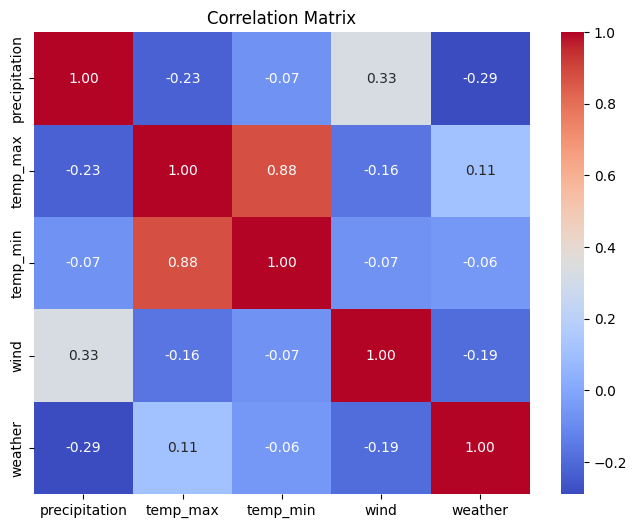

In [98]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png")
plt.show()

<h1>Training the Model</h1>
<h5>After mapping the target variable, it is time to train the model in order to help it classify which of the classifications does the weather parameters belong to.For this model, we will use the Decision Trees</h5>

In [99]:
X = df.drop(columns=['weather'])
y = df['weather']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [101]:
DTCmodel = DecisionTreeClassifier(random_state=42)
DTCmodel.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [102]:
RFCmodel = RandomForestClassifier(n_estimators=100, random_state=42)
RFCmodel.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [103]:
# Standardize the feature values (important for KNN)
scaler = StandardScaler()
KNNX_train = scaler.fit_transform(X_train)
KNNX_test = scaler.transform(X_test)

In [104]:
KNNmodel = KNeighborsClassifier(n_neighbors=5)
KNNmodel.fit(KNNX_train, y_train)

KNeighborsClassifier()

In [105]:
# Predictions
DTCy_pred = DTCmodel.predict(X_test)

In [106]:
RFCy_pred = RFCmodel.predict(X_test)

In [107]:
KNNy_pred = KNNmodel.predict(X_test)

C:\Users\Cristopher Artacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


<h1>Model Evaluation</h1>
<h5>After training the model, we will use Evaluation metrics in order to judge if the model's predictions are correct.</h5>

Accuracy: 0.7986
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       139
           1       0.84      0.78      0.81       125
           2       0.12      0.21      0.15        14
           3       0.33      0.17      0.22        12
           4       0.00      0.00      0.00         3

    accuracy                           0.80       293
   macro avg       0.44      0.42      0.42       293
weighted avg       0.81      0.80      0.80       293



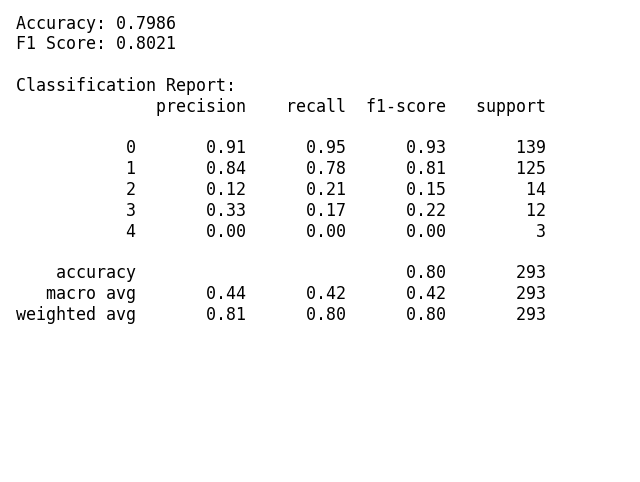

In [108]:
DTCaccuracy = accuracy_score(y_test, DTCy_pred)
DTCf1 = f1_score(y_test, DTCy_pred, average="weighted")
DTCreport = classification_report(y_test, DTCy_pred)

print(f"Accuracy: {DTCaccuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, DTCy_pred))

text_output = f"Accuracy: {DTCaccuracy:.4f}\nF1 Score: {DTCf1:.4f}\n\nClassification Report:\n{DTCreport}"

plt.figure(figsize=(8, 6))
plt.text(0.01, 0.99, text_output, fontsize=12, ha='left', va='top', family="monospace")
plt.axis("off")

plt.savefig("DTCclassification_report.png", bbox_inches="tight", dpi=300)
plt.show()

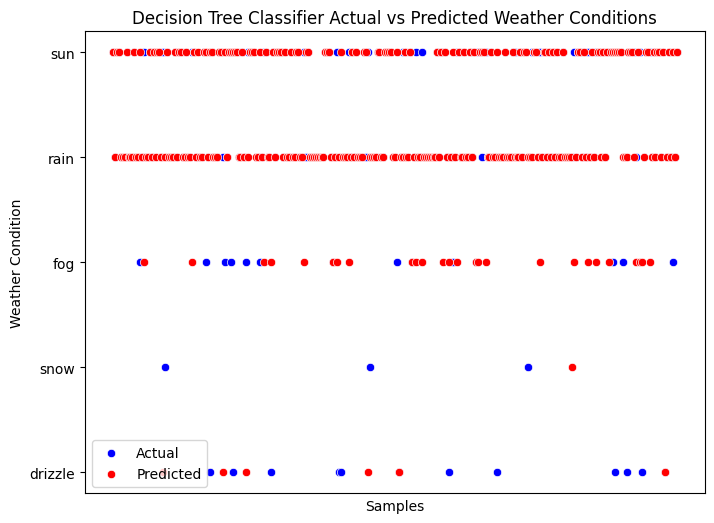

In [109]:
reverse_mapping = {v: k for k, v in weather_mapping.items()}

y_test_labels = [reverse_mapping[val] for val in y_test]
y_pred_labels = [reverse_mapping[val] for val in DTCy_pred]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=range(len(y_test)), y=y_test_labels, label='Actual', color='blue')
sns.scatterplot(x=range(len(DTCy_pred)), y=y_pred_labels, label='Predicted', color='red')
plt.xticks([])
plt.xlabel("Samples")
plt.ylabel("Weather Condition")
plt.title("Decision Tree Classifier Actual vs Predicted Weather Conditions")
plt.legend()
plt.savefig("DTCweather_predictions.png")
plt.show()


In [110]:
#SAVING THE MODEL AS A .pkl FILE
joblib.dump(DTCmodel, "DTCweather_model.pkl")
print("Model saved successfully!")

Model saved successfully!


Accuracy: 0.8669
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       139
           1       0.84      0.78      0.81       125
           2       0.12      0.21      0.15        14
           3       0.33      0.17      0.22        12
           4       0.00      0.00      0.00         3

    accuracy                           0.80       293
   macro avg       0.44      0.42      0.42       293
weighted avg       0.81      0.80      0.80       293



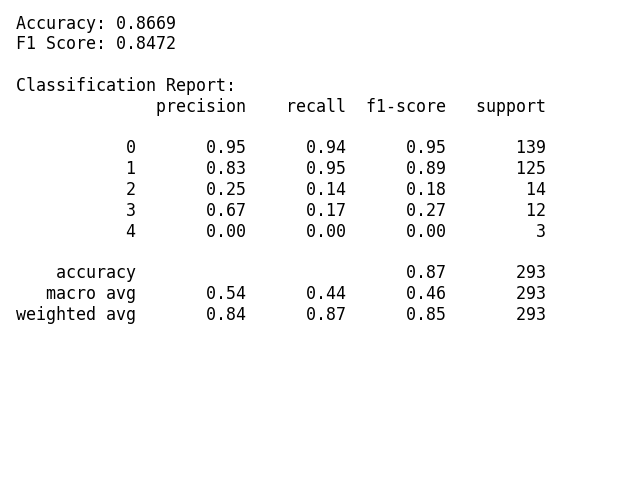

In [111]:
RFCaccuracy = accuracy_score(y_test, RFCy_pred)
RFCf1 = f1_score(y_test, RFCy_pred, average="weighted")
RFCreport = classification_report(y_test, RFCy_pred)

print(f"Accuracy: {RFCaccuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, DTCy_pred))

text_output = f"Accuracy: {RFCaccuracy:.4f}\nF1 Score: {RFCf1:.4f}\n\nClassification Report:\n{RFCreport}"

plt.figure(figsize=(8, 6))
plt.text(0.01, 0.99, text_output, fontsize=12, ha='left', va='top', family="monospace")
plt.axis("off")

plt.savefig("RFCclassification_report.png", bbox_inches="tight", dpi=300)
plt.show()

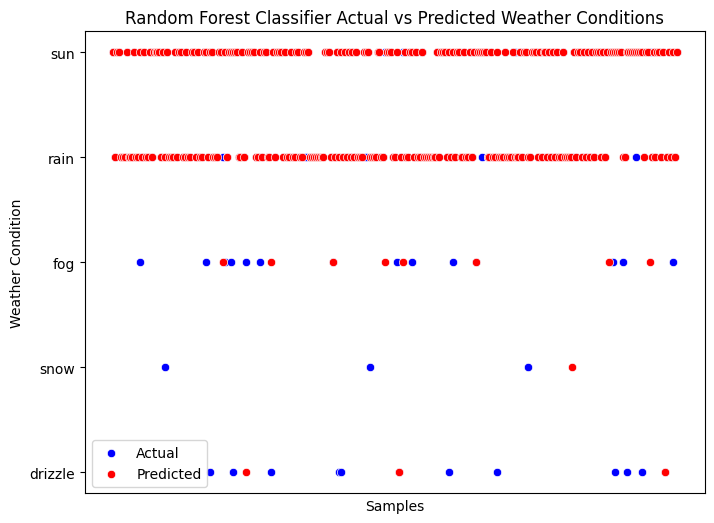

In [112]:
reverse_mapping = {v: k for k, v in weather_mapping.items()}

y_test_labels = [reverse_mapping[val] for val in y_test]
y_pred_labels = [reverse_mapping[val] for val in RFCy_pred]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=range(len(y_test)), y=y_test_labels, label='Actual', color='blue')
sns.scatterplot(x=range(len(DTCy_pred)), y=y_pred_labels, label='Predicted', color='red')
plt.xticks([])
plt.xlabel("Samples")
plt.ylabel("Weather Condition")
plt.title("Random Forest Classifier Actual vs Predicted Weather Conditions")
plt.legend()
plt.savefig("RFCweather_predictions.png")
plt.show()


In [113]:
#SAVING THE MODEL AS A .pkl FILE
joblib.dump(RFCmodel, "RFCweather_model.pkl")
print("Model saved successfully!")

Model saved successfully!


Accuracy: 0.6007
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       139
           1       0.84      0.78      0.81       125
           2       0.12      0.21      0.15        14
           3       0.33      0.17      0.22        12
           4       0.00      0.00      0.00         3

    accuracy                           0.80       293
   macro avg       0.44      0.42      0.42       293
weighted avg       0.81      0.80      0.80       293



C:\Users\Cristopher Artacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cristopher Artacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cristopher Artacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

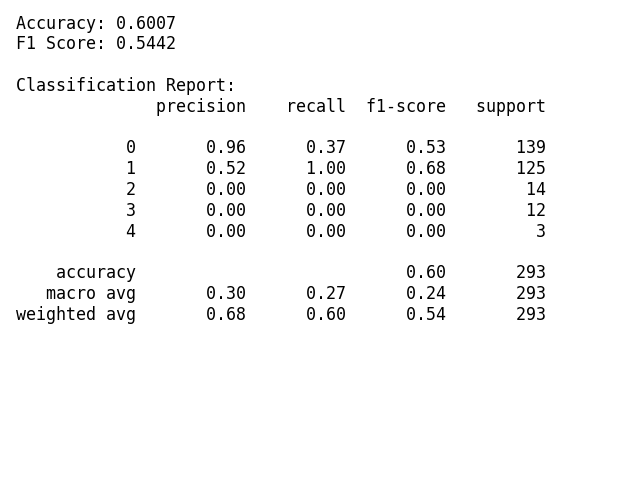

In [114]:
KNNaccuracy = accuracy_score(y_test, KNNy_pred)
KNNf1 = f1_score(y_test, KNNy_pred, average="weighted")
KNNreport = classification_report(y_test, KNNy_pred)

print(f"Accuracy: {KNNaccuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, DTCy_pred))

text_output = f"Accuracy: {KNNaccuracy:.4f}\nF1 Score: {KNNf1:.4f}\n\nClassification Report:\n{KNNreport}"

plt.figure(figsize=(8, 6))
plt.text(0.01, 0.99, text_output, fontsize=12, ha='left', va='top', family="monospace")
plt.axis("off")

plt.savefig("KNNclassification_report.png", bbox_inches="tight", dpi=300)
plt.show()

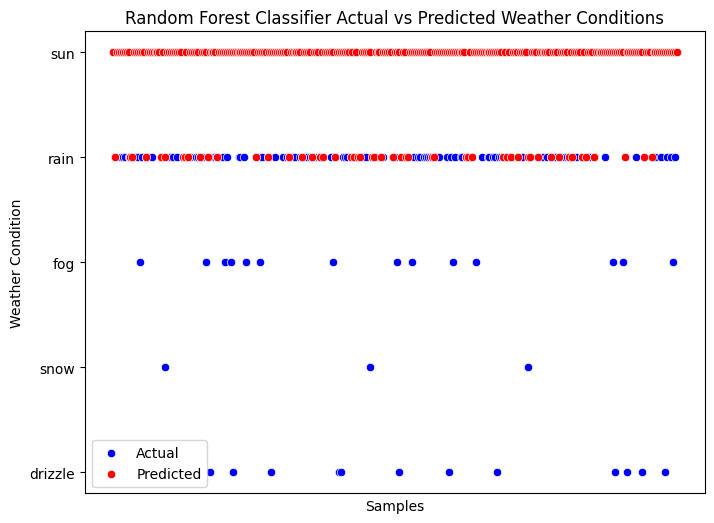

In [ ]:
reverse_mapping = {v: k for k, v in weather_mapping.items()}

y_test_labels = [reverse_mapping[val] for val in y_test]
y_pred_labels = [reverse_mapping[val] for val in KNNy_pred]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=range(len(y_test)), y=y_test_labels, label='Actual', color='blue')
sns.scatterplot(x=range(len(DTCy_pred)), y=y_pred_labels, label='Predicted', color='red')
plt.xticks([])
plt.xlabel("Samples")
plt.ylabel("Weather Condition")
plt.title("K Nearest Neighbor Actual vs Predicted Weather Conditions")
plt.legend()
plt.savefig("KNNweather_predictions.png")
plt.show()


In [116]:
#SAVING THE MODEL AS A .pkl FILE
joblib.dump(KNNmodel, "KNNweather_model.pkl")
print("Model saved successfully!")

Model saved successfully!
